
# Project: Investigate TMDb Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The Movie Database (TMDb) is a free, open, popular and completely user driven database for movies and TV shows. Since TMBb was created in 2008, the number of contributions to TMDb database has increased. The organization support 39 languages and receive rating from 180 countries.
The dataset to be analyzed is acleaned version of TMDb data on Kaggle contains informations about 10,000 movies. The dataset contains 21 columns to represents information about each movie such as title, TMDb id, IMDb id, budget, revenue, cast, number of voters, release date, genre of the movie, average voting and agian budget and revenue but with taking the infilation into account.

### The questions:

##### 1- What are the top ten movies with the largest budget, revenue, profit and average rating?
##### 2- What are the movies with the smallest budget, revenue, profit and average rating?
##### 3- The budget, revenue, profit and average rating over release years.
##### 4- What is the realtionship between popularity and revenue?
##### 5- Does the month of release affects the movie revenue?
##### 6- Which are the most frequent genres, production campanies and actor/actress?
##### 7- What is the geners those cost high budget?
##### 8- What kinds of properties are associated with movies that have high revenues?

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


<a id='wrangling'></a>
## Data Wrangling

### A. Data Loading



In [2]:
# Load the data from the given csv file to the df dataframe
df = pd.read_csv('tmdb-movies.csv')

#printing first five rows
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


##### - It can observed that the budget and revenue have no curruncy units.

### B. Assessing

In [3]:
#Exploring the dataset columns
df.columns


Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

##### -Some columns should be dropped because they are not related to the analysis.

In [4]:
#Exploring the basic informations about the dataset to detect the data types and Null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

##### -There are many columns contain Nulls.


In [5]:
#Exploring the descriptive statistics for each column
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


##### -The minimum value of budget, revenue, runtime, budget_adj and revenue_adj show that there are zeros values in these columns
##### - The maximum value of the runtime is very large which may be related to a TV series not movies.

In [6]:
#Dection of duplicates
sum(df.duplicated())

1

##### - There is one duplicates row

In [7]:
#Dection of number of zero budget movies
df['budget_adj'].value_counts()

0.000000e+00    5696
1.016400e+07      17
2.103337e+07      17
2.000000e+07      16
4.605455e+06      15
                ... 
4.658819e+06       1
6.641668e+07       1
2.289547e+07       1
2.206182e+06       1
2.264205e+06       1
Name: budget_adj, Length: 2614, dtype: int64

##### -There are 5696 cells in the budget_adj column have zero values must be cleaned.

In [8]:
#Dection of zero revenue movies
df['revenue_adj'].value_counts()

0.000000e+00    6016
1.438914e+07       2
5.766759e+07       2
1.000000e+06       2
2.093547e+08       2
                ... 
7.036068e+07       1
2.714497e+07       1
7.694895e+07       1
1.087002e+06       1
1.062776e+09       1
Name: revenue_adj, Length: 4840, dtype: int64

##### -There are 6016 cells in the قثرثىعث_adj column have zero values must be cleaned.

In [9]:
#Exploring the runtime of the movies
df['runtime'].value_counts()

90     547
95     358
100    335
93     328
97     306
      ... 
235      1
20       1
220      1
236      1
219      1
Name: runtime, Length: 247, dtype: int64

In [10]:
#Exploring the repettion of the key words
df['keywords'].value_counts()

woman director                                                           134
independent film                                                          82
sport                                                                     25
musical                                                                   24
suspense                                                                  24
                                                                        ... 
tyrannosaurus rex|friends|animation|alternate history|dinosaur             1
casino                                                                     1
brother sister relationship|wheelchair|hypnosis|investigation|coverup      1
egypt|suspense|curse|spirit|archaeologist                                  1
gang|zombies                                                               1
Name: keywords, Length: 8804, dtype: int64

##### -There are many cells in the keywords column contain data seperated by '|'

In [11]:
#Exploring the repettion of the geners
df['genres'].value_counts()

Comedy                                            712
Drama                                             712
Documentary                                       312
Drama|Romance                                     289
Comedy|Drama                                      280
                                                 ... 
Foreign|Action|Science Fiction|Thriller|Horror      1
Comedy|Horror|Music                                 1
Action|Science Fiction|Adventure|Mystery            1
Thriller|Drama|Romance|Crime                        1
Action|Comedy|Drama|Science Fiction                 1
Name: genres, Length: 2039, dtype: int64

##### -There are many cells in the genres column contain data seperated by '|', it should be cleaned for proper analysis.

In [12]:
#Exploring the the run time of the very long shows to detect the series
Long_movies = df.loc[ df['runtime'] > 240]
Long_movies['original_title']

415                                         Show Me a Hero
559                                        Childhood's End
1183                                             Ascension
1235                                              Klondike
1865                                                  Life
2107                                                Carlos
2170                              The Pillars of the Earth
2214                                           The Pacific
2630                                  Storm of the Century
2722                                      Band of Brothers
2843                                       The Blue Planet
3141                                       Generation Kill
3356                                            John Adams
3826                    Kill Bill: The Whole Bloody Affair
3886                                        Mildred Pierce
3894                         The Story of Film: An Odyssey
4030                                             Dinotop

##### There are 42 shows in the dataset have runtime larger than four hours

#### QualityIssues:
1- The columns budget and revnue had been calcuated again taking the infilation into consideration which represent the real value which more useful in comparison. Also, the columns  id, imdb_id, homepage, tagline and overview are not related to the analysis.

2- There are zero budget and zero revenue values which strongly affect the analysis.

3- There are zero run time.

4- There are shows with very large run time.

5- There is one duplication.

6- The release date is object
#### Tidiness issues
7- There is no column rpresents the profit of each movie.

### C. Cleaning

1- Delete The unuseful columns such as id, imdb_id, popularity, budget, revenue, homepage, tagline and overview.

In [13]:
#Drop the unusefull columns 
deleted_columns=[ 'id', 'imdb_id', 'budget', 'revenue', 'homepage', 'tagline', 'overview']
df_clean=df.drop(deleted_columns,1)
#Check the dropping process
df_clean.columns


Index(['popularity', 'original_title', 'cast', 'director', 'keywords',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

2-Droping the rows containing zero for budget and revenue columns

In [14]:
#Firstly, replacing the zeros with NANs
df_clean['revenue_adj'].replace(0, np.NAN, inplace=True)
df_clean['budget_adj'].replace(0, np.NAN, inplace=True)

df.dropna(axis=0, inplace=True)

#Now, drop any row which has NaN values 
df_clean.dropna(axis=0, inplace=True)

In [15]:
#check the dropping process
df_clean['budget_adj'].min(), df_clean['revenue_adj'].min()

(0.9693980425914721, 2.86193373421393)

3- Replacing the zero with NANs in the runtime column

In [16]:
df_clean['runtime'].replace(0, np.NAN, inplace=True)


In [17]:
#check the replacing process
df_clean['runtime'].min()

26

4- Deleting the rows related to the shows with very long run time (over than 240 minutes) whose most likely are serieses not movies.

In [18]:
#Detectiong and deleting of the serieses with long run time
serieses = df_clean[ df_clean['runtime'] > 240 ].index
df_clean.drop(serieses , inplace=True)

In [19]:
#Check the droping process
df_clean['runtime'].max()

219

5- Deleting the duplicates

In [20]:
df_clean.drop_duplicates(inplace=True)

In [21]:
#Check the duplicates droping process
sum(df_clean.duplicated())

0

6- Convert the release date from object type to date type.

In [22]:
#convert the data type of the release date to date type
df_clean['release_date'] = pd.to_datetime(df_clean['release_date'])
#check the conversion process
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3675 entries, 0 to 10848
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            3675 non-null   float64       
 1   original_title        3675 non-null   object        
 2   cast                  3675 non-null   object        
 3   director              3675 non-null   object        
 4   keywords              3675 non-null   object        
 5   runtime               3675 non-null   int64         
 6   genres                3675 non-null   object        
 7   production_companies  3675 non-null   object        
 8   release_date          3675 non-null   datetime64[ns]
 9   vote_count            3675 non-null   int64         
 10  vote_average          3675 non-null   float64       
 11  release_year          3675 non-null   int64         
 12  budget_adj            3675 non-null   float64       
 13  revenue_adj      

7- Creating a profit column by substracting the budget from the revenue

In [23]:
df_clean['profit'] = df_clean['revenue_adj'] - df_clean['budget_adj']

In [24]:
#check the new column
df_clean.head()

,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09


<a id='eda'></a>
## Exploratory Data Analysis



### 1- What are the top ten movies with the largest budget, revenue, profit and average rating.
#### A. The top ten movies with respect to budget


Text(0.5, 0, 'Movies')

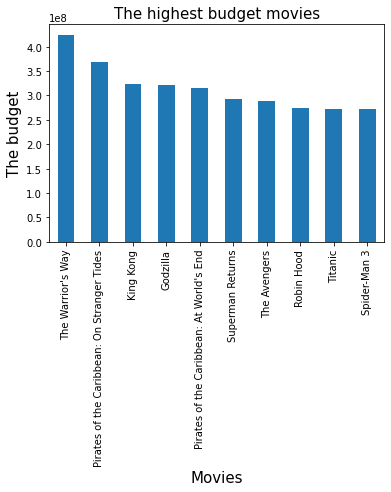

In [25]:
#calculate the budgets of each movie and representing the top ten using bar chart 
df_clean.groupby('original_title')['budget_adj'].sum().sort_values(ascending=False).head(10).plot(kind = 'bar')
plt.title('The highest budget movies', fontsize=15)
plt.ylabel('The budget', fontsize=15)
plt.xlabel('Movies', fontsize=15)


##### -The top ten movies they cost the largest budget than the other movies in the dataset are showed in the above bar chart

#### B. The top ten movies with respect to revenue


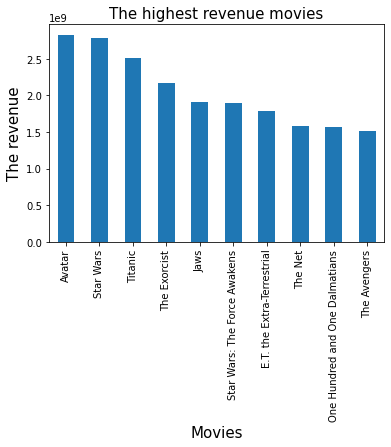

In [26]:
#calculate the budgets of each movie and representing the top ten using bar chart 
df_clean.groupby('original_title')['revenue_adj'].sum().sort_values(ascending=False).head(10).plot(kind = 'bar')
plt.title('The highest revenue movies', fontsize=15)
plt.ylabel('The revenue', fontsize=15)
plt.xlabel('Movies', fontsize=15);


##### -The top ten movies they gain the largest revenues than the other movies in the dataset are showed in the above bar chart

#### C. The top ten movies with respect to profit


Text(0.5, 0, 'Movies')

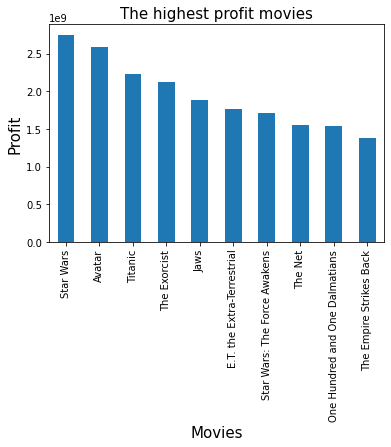

In [27]:
#calculate the profits of each movie and representing the top ten using bar chart 
df_clean.groupby('original_title')['profit'].sum().sort_values(ascending=False).head(10).plot(kind = 'bar')
plt.title('The highest profit movies', fontsize=15)
plt.ylabel('Profit', fontsize=15)
plt.xlabel('Movies', fontsize=15)

##### -The top ten movies they gain the highest profits than the other movies in the dataset are showed in the above bar chart

#### D. The top ten movies with respect to average rating

Text(0.5, 0, 'Movies')

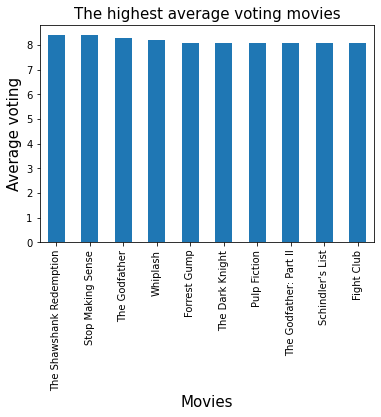

In [28]:
#calculate the average rating of each movie and representing the top ten using bar chart 
df_clean.groupby('original_title')['vote_average'].mean().sort_values(ascending=False).head(10).plot(kind = 'bar')
plt.title('The highest average voting movies', fontsize=15)
plt.ylabel('Average voting', fontsize=15)
plt.xlabel('Movies', fontsize=15)

##### -The top ten movies they gain highest average rating than the other movies in the dataset are showed in the above bar chart

### 2- What are the movies with the smallest budget, revenue, profit and average rating.
#### A. The lowest ten movies with respect to budget


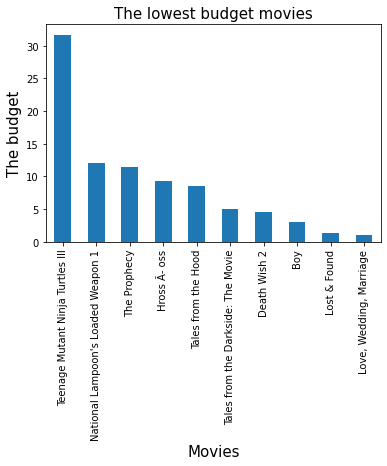

In [29]:
#calculate the budgets of each movie and representing the lowest ten using bar chart 
df_clean.groupby('original_title')['budget_adj'].sum().sort_values(ascending=False).tail(10).plot(kind = 'bar')
plt.title('The lowest budget movies', fontsize=15)
plt.ylabel('The budget', fontsize=15)
plt.xlabel('Movies', fontsize=15);


##### -The ten movies they cost the smallest budget than the other movies in the dataset are showed in the above bar chart

#### B. The lowest ten movies with respect to revenu


Text(0.5, 0, 'Movies')

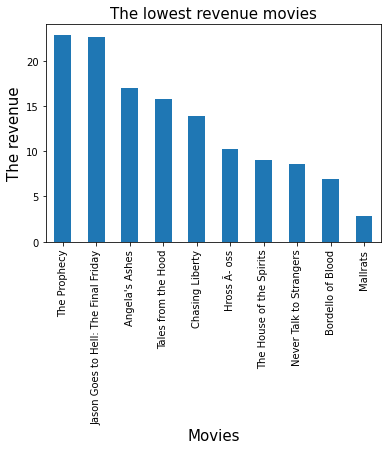

In [30]:
#calculate the revenues of each movie and representing the lowest ten using bar chart 
df_clean.groupby('original_title')['revenue_adj'].sum().sort_values(ascending=False).tail(10).plot(kind = 'bar')
plt.title('The lowest revenue movies', fontsize=15)
plt.ylabel('The revenue', fontsize=15)
plt.xlabel('Movies', fontsize=15)

##### -The ten movies they gain the smallest revenues than the other movies in the dataset are showed in the above bar chart

#### C. The lowest ten movies with respect to profit


Text(0.5, 0, 'Movies')

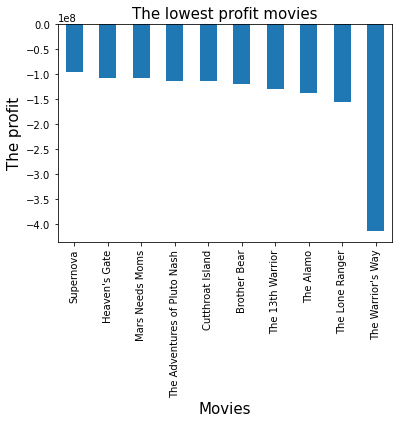

In [31]:
#calculate the profits of each movie and representing the lowest ten using bar chart 
df_clean.groupby('original_title')['profit'].sum().sort_values(ascending=False).tail(10).plot(kind = 'bar')
plt.title('The lowest profit movies', fontsize=15)
plt.ylabel('The profit', fontsize=15)
plt.xlabel('Movies', fontsize=15)

##### -The ten movies they gain the smallest profits than the other movies in the dataset are showed in the above bar chart

#### D. The lowest ten movies with respect to average rating

Text(0.5, 0, 'Movies')

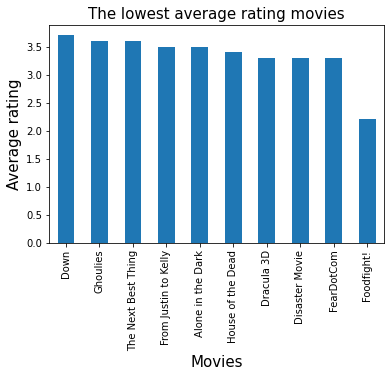

In [32]:
#calculate the vote averages of each movie and representing the lowest ten using bar chart 
df_clean.groupby('original_title')['vote_average'].sum().sort_values(ascending=False).tail(10).plot(kind = 'bar')
plt.title('The lowest average rating movies', fontsize=15)
plt.ylabel('Average rating', fontsize=15)
plt.xlabel('Movies', fontsize=15)

##### -The ten movies they gain the smallest average rating than the other movies in the dataset are showed in the above bar chart

### 3- The budget, revenue, profit and average rating over release years
#### A. The budget versus release year

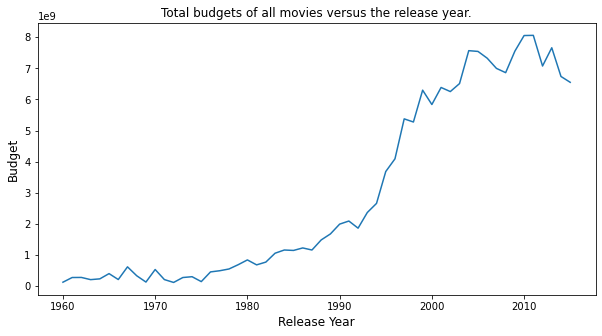

In [33]:
#Plot the sum of budget for all movies for each release year
profits_per_year = df_clean.groupby('release_year')['budget_adj'].sum().plot.line(x= 'release_year', y='budget_adj', figsize=(10,5))
plt.xlabel('Release Year', fontsize = 12)
plt.ylabel('Budget', fontsize = 12)
plt.title('Total budgets of all movies versus the release year.');


##### - The budgets of the movies increases over time, especially at the ten years between 1990 and 2000. 

#### B. The revenue versus release year

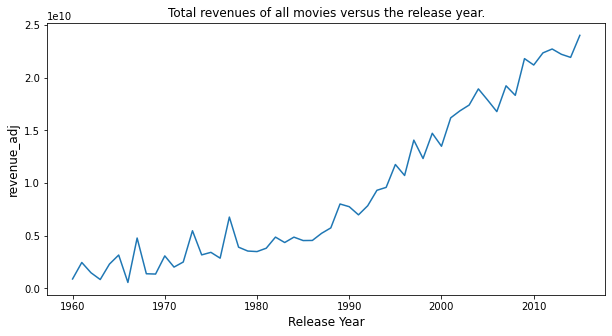

In [34]:
#Calculate the sum of revenue of all movies for each release year
profits_per_year = df_clean.groupby('release_year')['revenue_adj'].sum().plot.line(x= 'release_year', y='revenue_adj', figsize=(10,5))
plt.xlabel('Release Year', fontsize = 12)
plt.ylabel('revenue_adj', fontsize = 12)
plt.title('Total revenues of all movies versus the release year.');

##### - The revenues of the movies increases over time with almost a straight line relation since 1980.

#### C. The profit versus release year

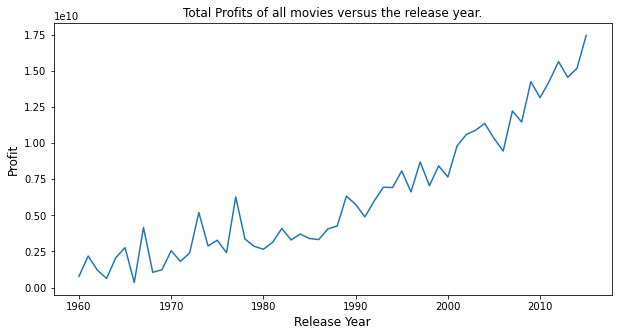

In [35]:
#Calculate the sum of profit of all movies for each year
profits_per_year = df_clean.groupby('release_year')['profit'].sum().plot.line(x= 'release_year', y='profit', figsize=(10,5))
plt.xlabel('Release Year', fontsize = 12)
plt.ylabel('Profit', fontsize = 12)
plt.title('Total Profits of all movies versus the release year.');

##### - The profits of the movies increases over time with almost a straight line relation since 1980.

#### D. The average rating versus release year

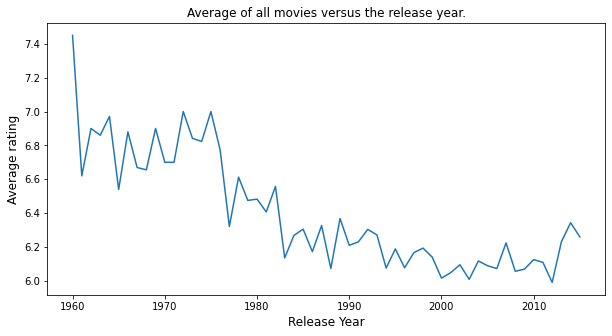

In [36]:
#Calculate the mean of the average rating of all movies for each year
profits_per_year = df_clean.groupby('release_year')['vote_average'].mean().plot.line(x= 'release_year', y='vote_average', figsize=(10,5))
plt.xlabel('Release Year', fontsize = 12)
plt.ylabel('Average rating', fontsize = 12)
plt.title('Average of all movies versus the release year.');

##### - The average rating of the movies was very high for earlier released movies and then decreased by time until it setteled after 1985.

### 4- What is the realtionship between popularity and revenue?


0.541892236464159

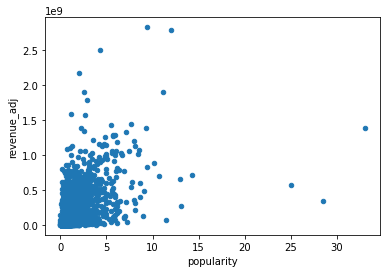

In [37]:
#Using scatter plot to determine the relationship between budget and revenue
df_clean.plot(x='popularity',y='revenue_adj',kind='scatter');
#calculate the correlation between the popularity and the movie revenue
df_clean.corr().loc['popularity','revenue_adj']

##### - The popularity and revenues have a positive correlation with value about 0.54

### 5- Does the month of release affects the movie revenue?


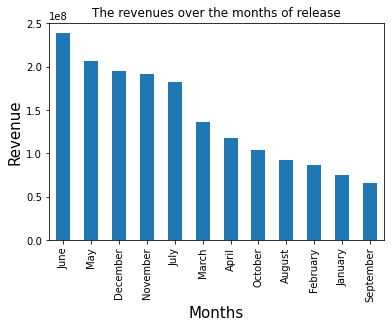

In [38]:
#Calculate the average revenue of movies per each month 
df_clean.groupby(df_clean['release_date'].dt.strftime('%B'))['revenue_adj'].mean().sort_values(ascending=False).plot(kind = 'bar');
plt.ylabel('Revenue', fontsize=15)
plt.xlabel('Months', fontsize=15);
plt.title('The revenues over the months of release');

##### -The releasing months versus revenues shows that there are releasing months gains higher than others

### 6- Which are the most frequent genres, production campanies and actor/actress?


In [39]:
#Define a function to split column and return the count of each type.
def split(x):
    #concatenate all the rows of the genrs.
    column_sep = df_clean[x].str.cat(sep = '|')
    types = pd.Series(column_sep.split('|'))
    #conts each of the genre and return.
    count = types.value_counts(ascending=False)
    return count

#### A. The most frequent genres

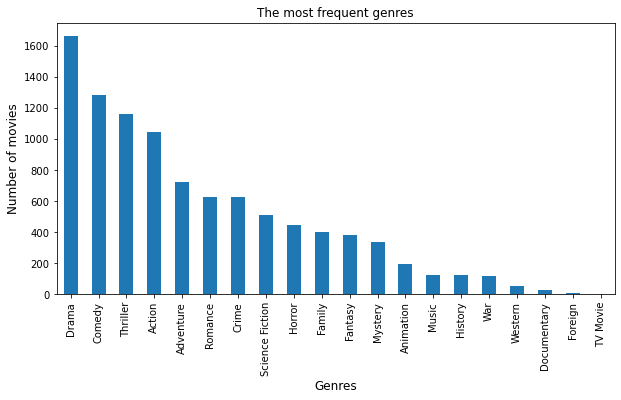

In [40]:
#Split the genres column and plot genres versus count of movies
split('genres').plot(kind = 'bar', figsize = (10,5));
plt.xlabel('Genres', fontsize = 12)
plt.ylabel('Number of movies', fontsize = 12)
plt.title('The most frequent genres');

##### -The most frequent top ten genres of movies are showed in the above bar chart.

#### B. The most frequent production companies

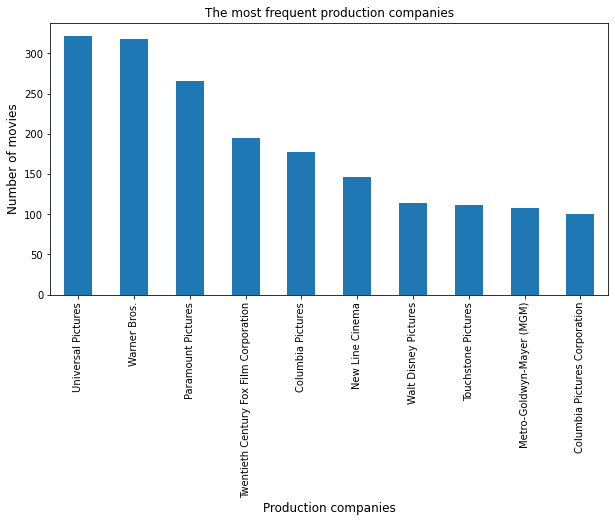

In [41]:
#Split the production_companies column and plot production companies versus count of movies
split('production_companies').sort_values(ascending=False).head(10).plot(kind = 'bar', figsize = (10,5));
plt.xlabel('Production companies', fontsize = 12)
plt.ylabel('Number of movies', fontsize = 12)
plt.title('The most frequent production companies');

##### -The most frequent top ten production companies are showed in the above bar chart.

#### C. The most frequent actor/actress

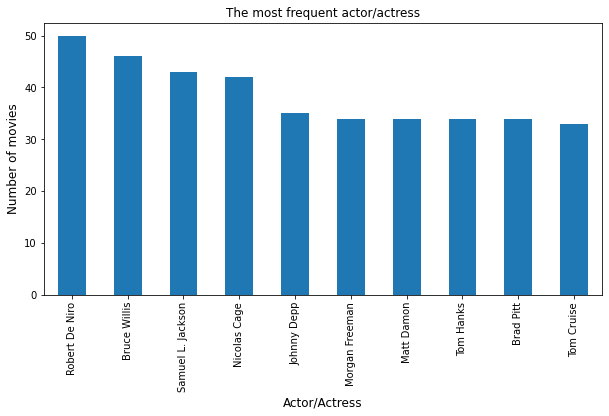

In [42]:
#Split the cast column and plot the actor/actress versus count of movies
split('cast').sort_values(ascending=False).head(10).plot(kind = 'bar', figsize = (10,5));
plt.xlabel('Actor/Actress', fontsize = 12)
plt.ylabel('Number of movies', fontsize = 12)
plt.title('The most frequent actor/actress');

##### -The most frequent top ten actors/actresses are showed in the above bar chart.

### 7- What is the geners those cost high budget?


In [43]:
#Define the high budget movie as the movie which cost a budget higher than the average value.
high_budget = df_clean[df_clean['budget_adj'] > df_clean['budget_adj'].mean()]

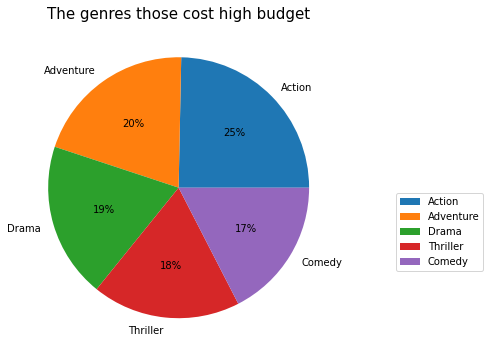

In [44]:
#Determine the genres those cost high budget
#Define a function to split column and return the count of each type.
def ssplitt(x):
    #concatenate all the rows of the genrs.
    column_sep = high_budget [x].str.cat(sep = '|')
    types = pd.Series(column_sep.split('|'))
    #conts each of the genre and return.
    count = types.value_counts(ascending=False)
    return count
#Split the genres column and plot genres versus count of movies
ssplitt('genres').sort_values(ascending=False).head(5).plot.pie(autopct='%0.0f%%',figsize = (15,6));
plt.ylabel('', fontsize=15)
plt.legend(bbox_to_anchor=(1.15,0.5), loc="upper left");
plt.title('The genres those cost high budget', fontsize = 15);


##### -The most frequent top five genres of movies they cost high budgets.

### 8- What kinds of properties are associated with movies that have high revenues?

In [45]:
#Define the high revenue movie as the movie which gain a revenue higher than the average value
high_revenue = df_clean[df_clean['revenue_adj'] > df_clean['revenue_adj'].mean()]

In [46]:
#Calculate the average budget for the high revenues movies
high_revenue['budget_adj'].mean()

83048123.75089352

##### The average budget of movies they gain high revenues is about 83048124

In [47]:
#Calculate the average run time for the high revenues movies
high_revenue['runtime'].mean()

116.75116063138347

##### The average runtime of movies they gain high revenues is about 83048124

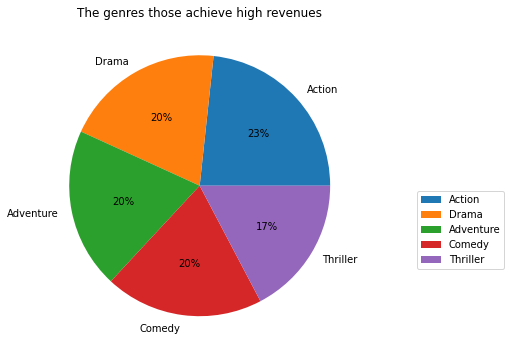

In [48]:
#Determine the genres those achieve high revenues
#Define a function to split column and return the count of each type.
def splitt(x):
    #concatenate all the rows of the genrs.
    column_sep = high_revenue[x].str.cat(sep = '|')
    types = pd.Series(column_sep.split('|'))
    #conts each of the genre and return.
    count = types.value_counts(ascending=False)
    return count
#Split the genres column and plot genres versus count of movies
splitt('genres').sort_values(ascending=False).head(5).plot.pie(autopct='%0.0f%%',figsize = (15,6));
plt.ylabel('', fontsize=15)
plt.legend(bbox_to_anchor=(1.15,0.5), loc="upper left");
plt.title('The genres those achieve high revenues');

##### -The most frequent top five genres of movies they gain high revenues are showed in the above pie chart.

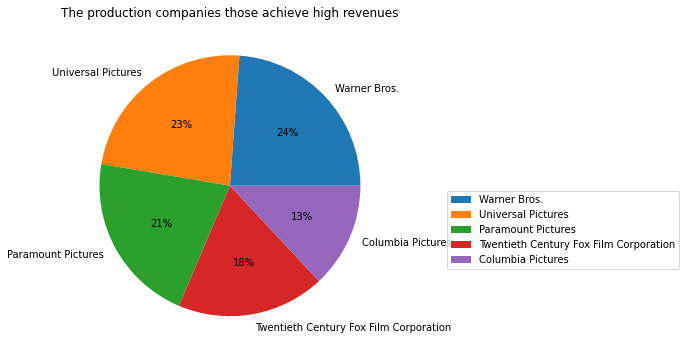

In [49]:
#Determine the production companies those achieve high revenues
#Split the genres column and plot genres versus count of movies
splitt('production_companies').sort_values(ascending=False).head(5).plot.pie(autopct='%0.0f%%',figsize = (15,6));
plt.ylabel('', fontsize=15)
plt.legend(bbox_to_anchor=(1.15,0.5), loc="upper left");
plt.title('The production companies those achieve high revenues');

##### -The most frequent top five production companies they gain high revenues are showed in the above pie chart.

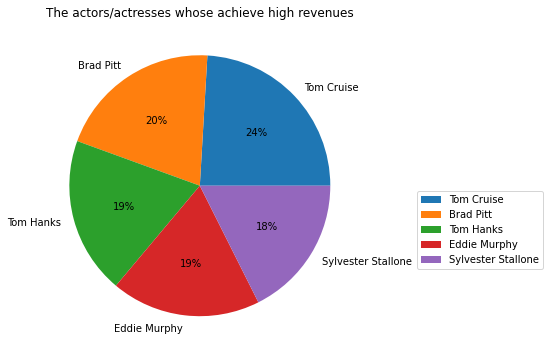

In [50]:
#Determine the actors/actresses whose achieve high revenues
#Split the genres column and plot genres versus count of movies
splitt('cast').sort_values(ascending=False).head(5).plot.pie(autopct='%0.0f%%',figsize = (15,6));
plt.ylabel('', fontsize=15)
plt.legend(bbox_to_anchor=(1.15,0.5), loc="upper left");
plt.title('The actors/actresses whose achieve high revenues');

##### -The most frequent top five actors whose gain high revenues are showed in the above pie chart.

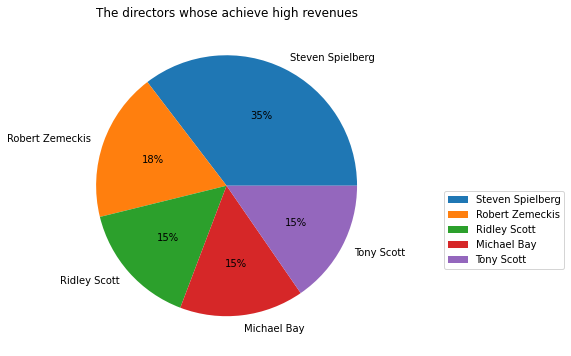

In [51]:
#Determine the directors whose achieve high revenues
high_revenue['director'].value_counts().sort_values(ascending=False).head(5).plot.pie(autopct='%0.0f%%',figsize = (15,6));
plt.ylabel('', fontsize=15)
plt.legend(bbox_to_anchor=(1.15,0.5), loc="upper left");
plt.title('The directors whose achieve high revenues');

##### -The most frequent top five directors whose gain high revenues are showed in the above pie chart.

<a id='conclusions'></a>
## Conclusions



1- The highest budget, revenue, profit and average rating movies according to the dataset are "The Warrior's Way", "Avatar","Star Wars" and "The Shawshank Redemption", respectivily. The analysis represents the top ten movies according to each variable.

2-The lowest budget, revenue, profit and average rating movies according to the dataset are "Love, Wedding, Marriage", "Mallrats","The Warrior's Way" and "Food Fight", respectivily. The analysis represents the lowest ten movies according to each variable.

3-The total budgets, revenues and movies are increase with time because of the increasing of the intersting of movies as a very important industry and the increasing of Movie theaters. The dataset was created in 2008 which, so if any one are a big fan of an old movie, he will be very care to add it to the list and highly rating this movie.

4-movies with high popularity tends to earn high revenue.

5-The movies released in june gain highest revenue than movies released in other months. While, movies released in september gain lowest revenue.

6- The drama mocies are the most frequent genre followed by comedy, thriller, action and other genres. The largeset number of movies in the data set was produced by Universal Pictures, while, Robert De Niro was the star with the highest number of movies.

7-The action movies are the most costly followed by adventure, drama and thriller, while, the comedy is the least expensive movies in the top five list.

8-The properties associated with movies that have high revenues:

a.The average budget was 83048124 and the average runtime was 117 minutes.

b.The genres of the largest number of movies with high revenues were Action, Adventure, Drama, Comedy and Thriller.

c.The production companies produced the largest number of movies with high revenues were Warner Bros, Universal Pictures, Paramount Pictures, Twentieth Century Fox Film Corporation and Columbia Pictures.

d.The actors had the largest number of movies with high revenues were Tom Cruise , Brad Pitt, Tom Hanks, Eddie Murphy and Sylvester Stallone.

e.The directors had the largest number of movies with high revenues were Steven Spielberg, Robert Zemeckis, Clint Eastwood, Michael Bay and Ridley Scott

### Limitations:
The above conclusion may not completely true because of the following limitations:

1- The budget and revenue column are given without currency unit.

2- Almost half of the dataset have zero budgets and revenue.

3- Some movies have a large number of genres which was confusing, I had to split the data for proper exploration.

4- The cast members were seperated by '|', I had to split it for proper exploration.

5- There are some important missing data for perfect analysis such the writers of the movies and revenues from digital copies.


